# COMP90086 Workshop 4

In this workshop, you will have some practice of color manipulation and canny edge detection. We will also verify the installed software for the next week's workshop.

Table of Contents

- Color
    - Colour space transformations
    - Colour manipulations
    
- Edge
    - Canny edge detection step by step
    
- Exercise

- Verify softare for the next week
    


# Color

## (1) Colour space transformations

### <center>RGB(red/green/blue) vs. HSV(Hue/Saturation/Value)</center>

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/RGB_color_solid_cube.png/1920px-RGB_color_solid_cube.png" width=300 height=300>

(Image Source: Wikipedia)

<img style="float: ;" src="https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/opencv_color_spaces_rgb_additive.png?lossy=1&strip=1&webp=1" width=300 height=300>

(Image Source: These images appears in many places, including [here](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/opencv_color_spaces_rgb_additive.png?lossy=1&strip=1&webp=1))

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/3/33/HSV_color_solid_cylinder_saturation_gray.png" width=300 height=300>

(Image Source: Wikipedia)


### <center>RGB(device-dependent) vs. XYZ (device-independent)</center>

<center>The CIE XYZ standard observer color matching functions </center>

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/8/8f/CIE_1931_XYZ_Color_Matching_Functions.svg" width=300 height=300>

(Image Source: Wikipedia)

### <center>Lab</center>

L*: The lightness value, defines black at 0 (down) and white at 100 (up), with neutral grays at the center of the axis. 

The a* axis represents the green–red opponent, with negative values toward green and positive values toward red. 

The b* axis represents the blue–yellow opponents, with negative numbers toward blue and positive toward yellow.

In theory there are no maximum values of a* and b*, but in practice they are usually numbered from -128 to +127 (256 levels).

<img style="float: ;" src="https://www.mdpi.com/diagnostics/diagnostics-13-00467/article_deploy/html/images/diagnostics-13-00467-g003.png" width=300 height=300>

(Image Source: These images appears in many places, including [here](https://www.mdpi.com/diagnostics/diagnostics-13-00467/article_deploy/html/images/diagnostics-13-00467-g003.png))

[Color conversions Explanation](https://docs.opencv.org/4.6.0/de/d25/imgproc_color_conversions.html)

In [1]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt

[cv2.IMREAD_UNCHANGED](https://docs.opencv.org/4.6.0/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80aeddd67043ed0df14f9d9a4e66d2b0708): It is used to read the image as it is. It does not make any changes or ignore anything from the image. You can also specify -1 for this flag.

[cv2.cvtColor( )](https://docs.opencv.org/4.6.0/d8/d01/group__imgproc__color__conversions.html)

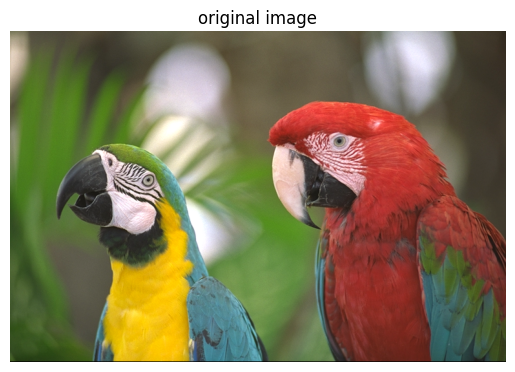

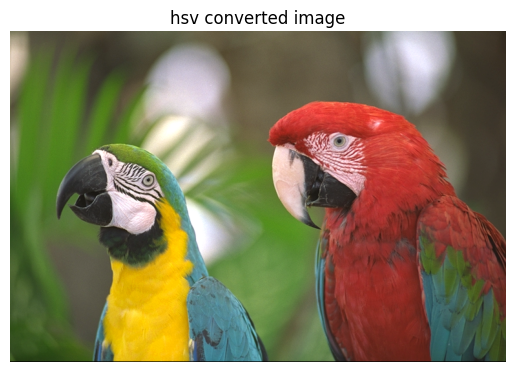

In [2]:
rootpath='./'
img = cv2.imread(os.path.join(rootpath, "kodim23.png"),cv2.IMREAD_UNCHANGED ) #BGR

#rearrange the channel for showing image
img1 = np.zeros(img.shape,np.uint8)
img1[:,:,0] = img[:,:,2] #red
img1[:,:,1] = img[:,:,1] #green
img1[:,:,2] = img[:,:,0] #blue

plt.imshow(img1)
plt.title('original image')
plt.axis('off')
plt.show()


img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_cvt = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

#rearrange the channel for showing image
img2 = np.zeros(img_cvt.shape,np.uint8)
img2[:,:,0] = img_cvt[:,:,2] #red
img2[:,:,1] = img_cvt[:,:,1] #green
img2[:,:,2] = img_cvt[:,:,0] #blue

plt.imshow(img2)
plt.title('hsv converted image')
plt.axis('off')
 
plt.show()


### Exercise 1

- Transform RGB to XYZ color space and show each channel.
- Transform XYZ back to RGB, and show the final image .

In [3]:
#your code

- Transform RGB to LAB colorspace and show each channel.
- Transform LAB back to RGB, and show the final image.

In [4]:
#your code

## (2) Colour manipulation

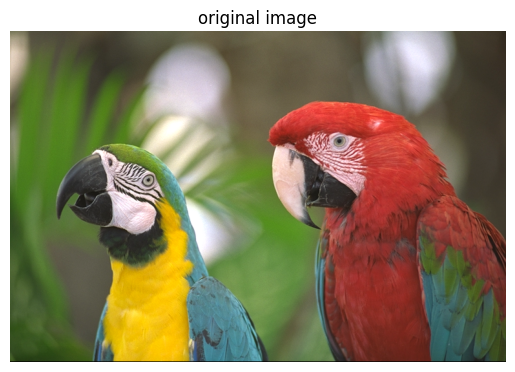

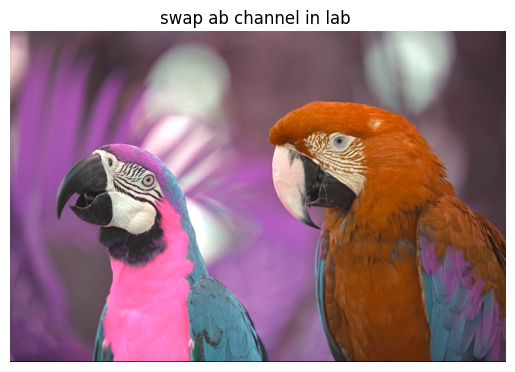

In [5]:
rootpath = './'
img = cv2.imread(os.path.join(rootpath, "kodim23.png"),cv2.IMREAD_UNCHANGED ) #BGR

#rearrange the channel for showing image
img1 = np.zeros(img.shape,np.uint8)
img1[:,:,0] = img[:,:,2] #red
img1[:,:,1] = img[:,:,1] #green
img1[:,:,2] = img[:,:,0] #blue

img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

#swap a b channel for showing difference
img_lab2 = np.zeros(img_lab.shape,np.uint8)
img_lab2[:,:,0] = img_lab[:,:,0] 
img_lab2[:,:,1] = img_lab[:,:,2] 
img_lab2[:,:,2] = img_lab[:,:,1]

img_cvt = cv2.cvtColor(img_lab2, cv2.COLOR_Lab2BGR)

#rearrange the channel for showing image
img2 = np.zeros(img_cvt.shape,np.uint8)
img2[:,:,0] = img_cvt[:,:,2] #red
img2[:,:,1] = img_cvt[:,:,1] #green
img2[:,:,2] = img_cvt[:,:,0] #blue



plt.imshow(img1)
plt.title('original image')
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.title('swap ab channel in lab ')
plt.axis('off')
 
plt.show()


### Exercise 2
- Transform to LAB, invert the `a` axis, then back transform to RGB. Show the result.

In [6]:
#your code

# Edge

##  (1) Canny edge detection step by step

### Load the image using OpenCV with grayscale.

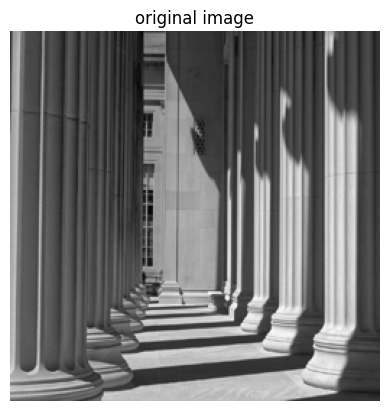

In [7]:
rootpath='./'
org_img = cv2.imread(os.path.join(rootpath, "cannyimg.png"),cv2.IMREAD_GRAYSCALE )
org_img = org_img.astype(float)

 
plt.imshow(org_img ,cmap='gray')  
plt.title('original image')
plt.axis('off')

plt.show()
  

### Find edge magnitude and orientation (Gradient Calculation)
- Edges are points in the image with a high change in intensity = high change in gradient.
- Accurate edge detection requires smoothing image noise.
- Edge detector = derivative of Gaussian filter, combines smoothing and gradient response.

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Wiki_slope_in_2d.svg" width=250 height=150>

(Image Source: Wikipedia)

<img style="float: ;" src="https://pic2.zhimg.com/v2-aad2460de5edbb636b1028e47957c5e1_b.webp" width=250 height=150>

(Image Source: These images appears in many places, including [here](https://pic2.zhimg.com/v2-aad2460de5edbb636b1028e47957c5e1_b.webp))

<img style="float: ;" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/23ae6772c5f58751fc6014b71d6adafb30a31c79" width=200 height=100>

<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/math.png" width=200 height=100>

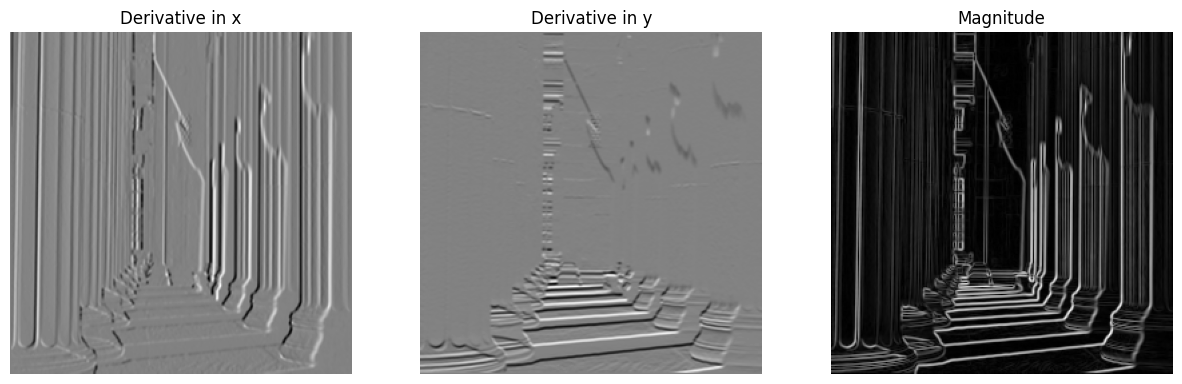

In [8]:
# X-Direction Kernel (Vertical)
sobel_kernel_x = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
# Y-Direction Kernel (Horizontal)
sobel_kernel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

# Use Sobel filter to approximate the derivative of gaussian (for both x and y)
dx = cv2.filter2D(org_img,-1,sobel_kernel_x)
dy = cv2.filter2D(org_img,-1,sobel_kernel_y)

magnitude = np.hypot(dx, dy)   # equivalent to sqrt(x1**2 + x2**2), element-wise
 
angle = np.arctan2(dy, dx)     # Element-wise arc tangent of dy/dx 

fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)

plt.subplot(1,3,1)
plt.imshow(dx,cmap='gray') 
plt.title('Derivative in x')
plt.axis('off')
 
plt.subplot(1,3,2)
plt.imshow(dy,cmap='gray') 
plt.title('Derivative in y')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(magnitude,cmap=  'gray') 
plt.title('Magnitude')
plt.axis('off')

plt.show()


### Exercise 3: Non-maximum Suppression of Edges (fill the code for diagonal directions)
- Bin edges by orientation
- For each edge pixel:
    - Check the two neighbour pixels orthogonal to this edge pixel
    - If either neighbour has same edge orientation AND higher magnitude, this pixel is not an edge
    
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/zone.jpg" width=350 height=350>

(Image Source: Jiayang)

<img style="float: ;" src="https://i0.wp.com/theailearner.com/wp-content/uploads/2019/05/Grad_direc-2.png?w=713&ssl=1" width=350 height=350>

(Image Source: These images appears in many places, including [here](https://i0.wp.com/theailearner.com/wp-content/uploads/2019/05/Grad_direc-2.png?w=713&ssl=1))

<img style="float: ;" src="https://docs.opencv.org/3.4/nms.jpg" width=500 height=500>
(Image Source: OpenCV)

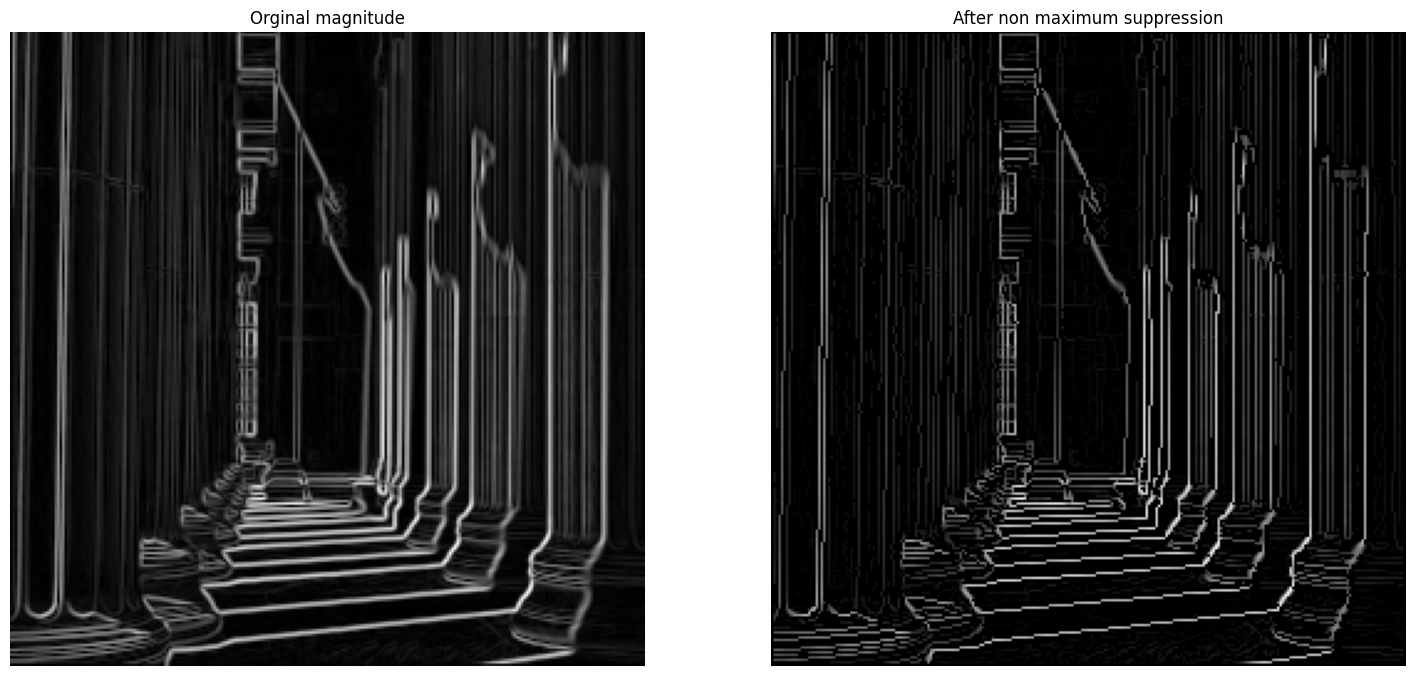

In [9]:
def non_maximum_suppression(magnitude,angle):
    
    size = magnitude.shape
    result = np.zeros_like(magnitude) #Return an array of zeros with the same shape and type as a given array.

    angle = np.rad2deg(angle) + 180    # Convert angle from radians to degrees.

    
    for i in range(1, size[0]-1):         # row,    vertical
        for j in range(1, size[1]-1):     # column, horizontal
            
            # round the angle to one of four angles representing: 
            # 1 * horizontal, 2 * diagonal (45 degrees and 135 degrees), 1 * vertical directions.
            
            # horizontal
            if 157.5 <= angle[i,j] < 202.5 or 0 <= angle[i,j] < 22.5 or 337.5 <= angle[i,j] <= 360:
                p1 = magnitude[i,j-1]  # left
                p2 = magnitude[i,j+1]  # right
                
            # vertical
            elif 67.5 <= angle[i,j] < 112.5 or 247.5 <= angle[i,j] < 292.5:
                p1 = magnitude[i+1,j]  # upper
                p2 = magnitude[i-1,j]  # lower
            
            # 45 degrees
            ## your code
                
            # 135 degrees
            ## your code
            
            # Update the result only if one neighbour has same edge orientation (done above) AND higher magnitude
            if magnitude[i,j] >= p1 and magnitude[i,j] >= p2:
                result[i,j] = magnitude[i,j]
                
    return result 

magnitude_nms = non_maximum_suppression(magnitude,angle)
# magnitude_nms = np.uint32(magnitude_nms)    # The gradient values might be very large - they should not overflow

fig,axs = plt.subplots(1,2)
fig.set_figwidth(18)
fig.set_figheight(18)

# plt will normalize the magnitude to [0, 255]
plt.subplot(1,2,1)
plt.imshow(magnitude, cmap='gray') 
plt.title('Orginal magnitude')
plt.axis('off')
 
plt.subplot(1,2,2)
plt.imshow(magnitude_nms, cmap='gray') 
plt.title('After non maximum suppression')
plt.axis('off')

plt.show()


### Hysteresis Thresholding

- Two thresholds T<sub>1</sub>, T<sub>2</sub>, with T<sub>1</sub> > T<sub>2</sub>
- Strong edges: magnitude > T<sub>1</sub>
- Weak edges: T<sub>1</sub> > magnitude > T<sub>2</sub>
- For each weak edge:
    - Check the 8-pixel neighbourhood around this pixel
    - If any neighbour is a strong edge, relabel the weak edge pixel as a strong edge
- Final edge map = strong edges

<img style="float: ;" src="https://docs.opencv.org/3.4/hysteresis.jpg" width=500 height=500>

(Image Source: OpenCV)

In [10]:
import timeit   # Measure execution time

Time:  0.0680764159999998


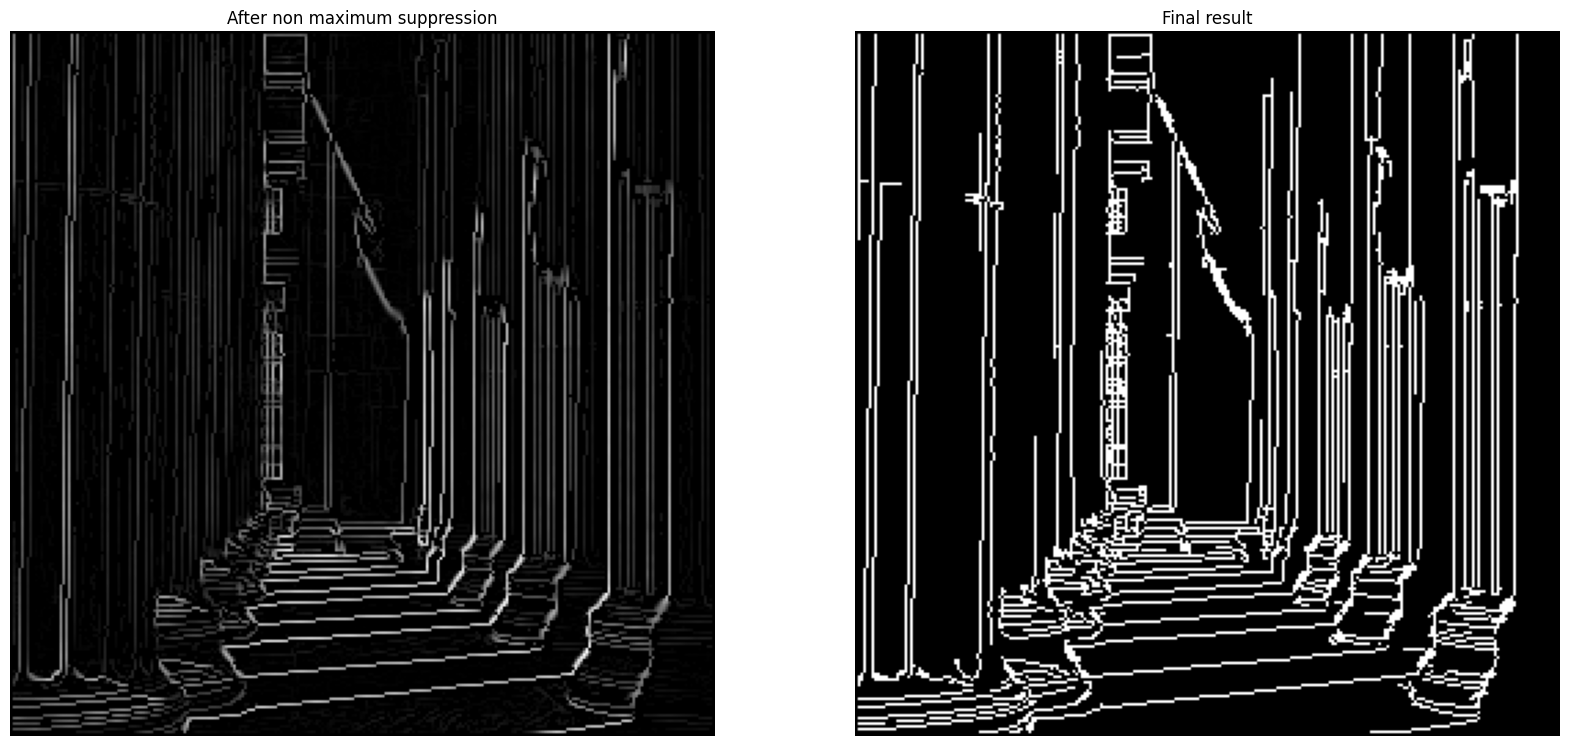

In [11]:
def hysteresis_threshold(magnitude, low_threshold=50, high_threshold=200):
    
    size = magnitude.shape
    result = np.zeros_like(magnitude)
 
    strong_edge_value = np.int32(255)     # int32 will resolve overflow issue of gredients
    
    strong_edges_x, strong_edges_y = np.where(magnitude >= high_threshold)
    non_edges_x, non_edges_y = np.where(magnitude <= low_threshold)
    
    result[strong_edges_x, strong_edges_y] = strong_edge_value
    
    weak_edge_x, weak_edge_y = np.where((magnitude < high_threshold) & (magnitude > low_threshold))
    
    # We need to repeat this for several times, as some weak edges are relabeled as strong egdes during each iteration
    for _ in range(2):    
        for i in range(len(weak_edge_x)):
            x,y = weak_edge_x[i], weak_edge_y[i]
            # check 8-pixel neighbourhood around this pixel
            if result[x+1,y] == strong_edge_value or result[x+1,y+1] == strong_edge_value or \
            result[x+1,y-1] == strong_edge_value or result[x-1,y] == strong_edge_value or result[x-1,y+1] == strong_edge_value or \
            result[x-1,y-1] == strong_edge_value or result[x,y+1] == strong_edge_value or result[x,y-1] == strong_edge_value:
                 result[x, y] = strong_edge_value

        for i in reversed(range(len(weak_edge_x))):
            x,y = weak_edge_x[i], weak_edge_y[i]
            # check 8-pixel neighbourhood around this pixel
            if result[x+1,y] == strong_edge_value or result[x+1,y+1] == strong_edge_value or \
            result[x+1,y-1] == strong_edge_value or result[x-1,y] == strong_edge_value or result[x-1,y+1] == strong_edge_value or \
            result[x-1,y-1] == strong_edge_value or result[x,y+1] == strong_edge_value or result[x,y-1] == strong_edge_value:
                 result[x, y] = strong_edge_value

    return result

start = timeit.default_timer()

final_res = hysteresis_threshold(magnitude_nms, 50, 196)

stop = timeit.default_timer()
print('Time: ', stop - start)

fig,axs = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(20)

plt.subplot(1,2,1)
plt.imshow(magnitude_nms,cmap='gray') 
plt.title('After non maximum suppression')
plt.axis('off')
 
plt.subplot(1,2,2)
plt.imshow(final_res,cmap='gray') 
plt.title('Final result')
plt.axis('off')

plt.show()

Time:  2.8856227089999997


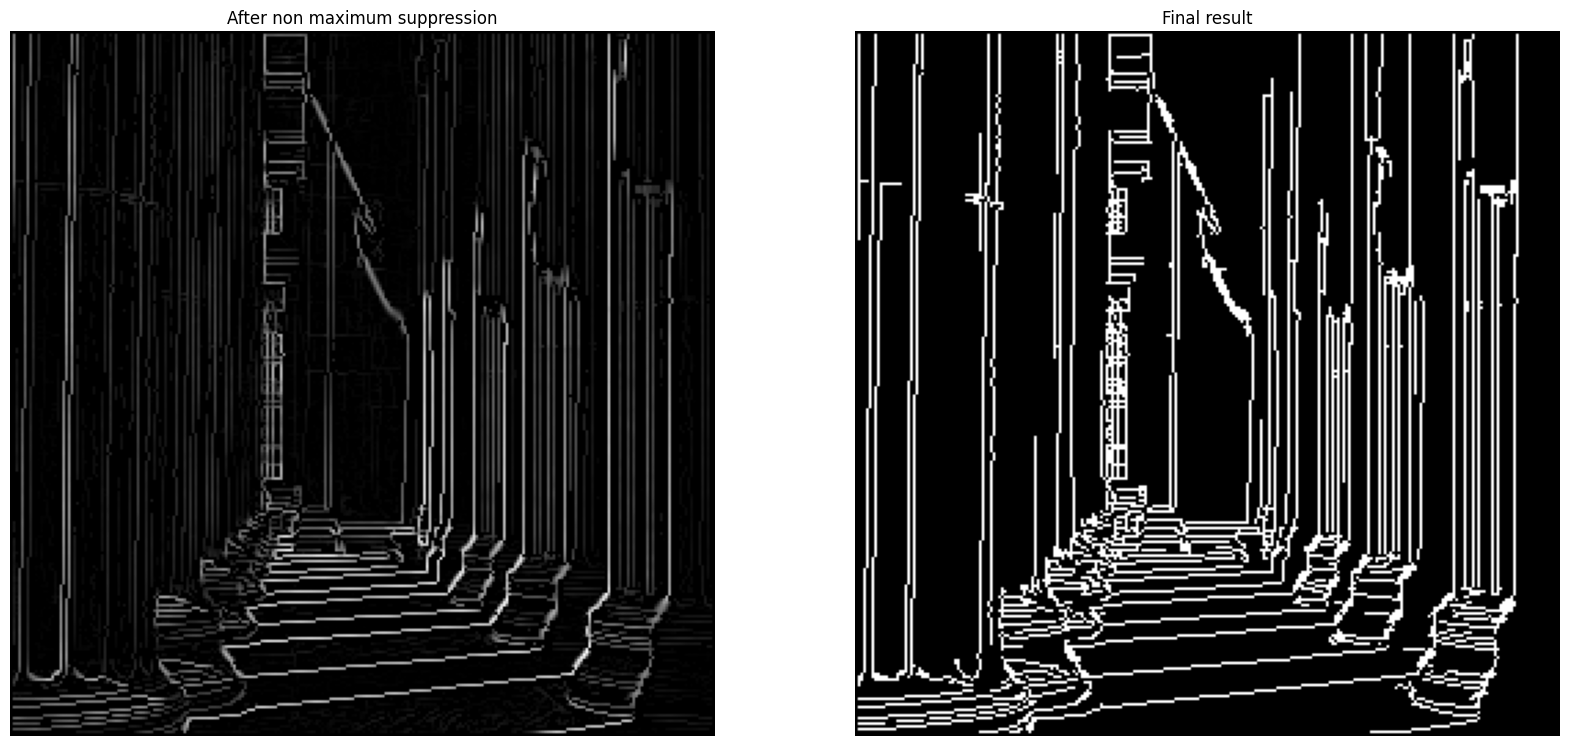

In [12]:
import itertools 
# Functions creating iterators for efficient looping
OFFSETS = list(itertools.product([-1, 0, 1], [-1, 0, 1]))
OFFSETS.remove((0, 0))
# OFFSETS = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

def hysteresis_threshold(magnitude, low_threshold=50, high_threshold=200):
    
    size = magnitude.shape
    result = np.zeros_like(magnitude)
    
    strong_edge_value = np.int32(255)
    weak_edge_value = np.int32(low_threshold)
    
    strong_edges_x, strong_edges_y = np.where(magnitude >= high_threshold)
    non_edges_x, non_edges_y = np.where(magnitude <= low_threshold)
    
    result[strong_edges_x, strong_edges_y] = strong_edge_value  # make all existing strong edges as 255
    
    weak_edge_x, weak_edge_y = np.where((magnitude < high_threshold) & (magnitude > low_threshold))
    result[weak_edge_x, weak_edge_y] = weak_edge_value          # make all existing strong edges as the low threshold (T_2)
    
    strong_num = len(strong_edges_x)
    prev_strong_num = 0
   
    while(strong_num != prev_strong_num): # find all weak edges until the number does not change
        prev_strong_num = strong_num
        weak_edge_x, weak_edge_y = np.where(result == weak_edge_value)

        for i in range(len(weak_edge_x)):
            x,y = weak_edge_x[i], weak_edge_y[i]
            # check 8-pixel neighbourhood around this pixel
            has_strong_edge = False
            for offset_x, offset_y in OFFSETS:
                if result[x+offset_x, y+offset_y] == strong_edge_value:
                    has_strong_edge = True         
            if has_strong_edge:
                result[x, y] = strong_edge_value
                strong_num += 1
    
    weak_edge_x, weak_edge_y = np.where(result == weak_edge_value)
    result[weak_edge_x, weak_edge_y] = 0
 
    return result

start = timeit.default_timer()

final_res = hysteresis_threshold(magnitude_nms, 50, 196) 

stop = timeit.default_timer()
print('Time: ', stop - start)

fig,axs = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(20)

plt.subplot(1,2,1)
plt.imshow(magnitude_nms,cmap='gray') 
plt.title('After non maximum suppression')
plt.axis('off')
 
plt.subplot(1,2,2)
plt.imshow(final_res,cmap='gray') 
plt.title('Final result')
plt.axis('off')

plt.show()

The process of Canny Edge Detection algorithm can be broken down to multi-stage:

- 1.Apply Gaussian filter to smooth the image in order to remove the noise

- 2.Find edge magnitute and direction (Gradient Calculation)

- 3.Apply Non-Maximum Suppression to thin the edges

- 4.Apply Hysteresis Thresholding to find "really edges" and further reduce the noise.

### Exercise 4: Canny edge detection with OpenCV
- Conduct experiments with the built-in Canny function in opencv to see the effect of changing the thresholds and the scale (=apertureSize)

See: https://docs.opencv.org/4.6.0/da/d22/tutorial_py_canny.html

[cv.Canny](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) (image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]	) 

Parameters

- image:	8-bit input image.

- edges:	output edge map; single channels 8-bit image, which has the same size as image.

- threshold1:	first threshold for the hysteresis procedure.

- threshold2:	second threshold for the hysteresis procedure.

- apertureSize:	aperture size for the Sobel operator. By default it is 3.

- L2gradient: a flag, indicating whether a more accurate should be used to calculate the image gradient magnitude

L2gradient (By default, it is False):

- If True, it uses the equation mentioned above which is more accurate

- If False, it uses this function: Edge_Gradient(G)=|Gx|+|Gy|

In [13]:
## your code


### Exercise 5

Assume that all surfaces in the image below are Lambertian (diffuse reflectance) surfaces, and the scene is lit by a single light source. 

i) What are the scene/object parameters that determine the R,G,B value of each pixel in this scene? 

ii) At the region indicated by the circle and arrow, which of the parameters you listed in (i) are changing and which are constant?

### Image 1
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/img1.png" width=400 height=400>

### Image 2
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/img2.png" width=400 height=400>

### Image 3
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/img3.png" width=400 height=400>

# Verify softare for the next week

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
 

print("TensorFlow version: ", tf.__version__)


TensorFlow version:  2.7.0
